# 사이킷런과 선형회귀

원자료
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 저자 : 박동규, 강영민
* 책의 소스코드 저장소 : https://github.com/dongupak/DataML
* 안내 : 이 노트북은 책의 코드를 담고 있습니다.
* 저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### 간단한 선형 회귀

In [ ]:
import numpy as np 
from sklearn import linear_model  # scikit-learn 모듈을 가져온다

regr = linear_model.LinearRegression() 

In [ ]:
X = [[163], [179], [166], [169], [171]]
y = [54, 63, 57, 56, 58]
regr.fit(X, y)

LinearRegression()

In [ ]:
coef = regr.coef_            # 직선의 기울기
intercept = regr.intercept_  # 직선의 절편
score = regr.score(X, y)     # 학습된 직선이 데이터를 얼마나 잘 따르나

print("y = {}* X + {:.2f}".format(coef.round(2), intercept))
print("데이터와 선형회귀 직선의 관계점수: {:.1%}".format(score))

y = [0.53]* X + -32.50
데이터와 선형회귀 직선의 관계점수: 91.9%


### 다중선형회귀



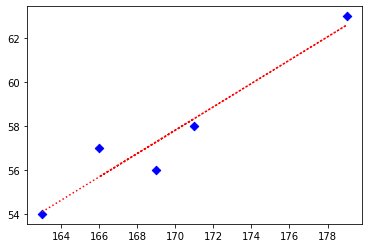

In [ ]:
import matplotlib.pyplot as plt

# 학습 데이터와 y 값을 산포도로 그린다. 
plt.scatter(X, y, color='blue', marker='D')
# 학습 데이터를 입력으로 하여 예측값을 계산한다.
y_pred = regr.predict(X)
# 계산된 기울기와 y 절편을 가지는 점선을 그려보자
plt.plot(X, y_pred, 'r:')

In [ ]:
unseen = [[167]]
result = regr.predict(unseen)
print('철수의 키가 {}cm 이므로 몸무게는 {}kg으로 추정됨'.format(\
                      unseen, result.round(1)))

철수의 키가 [[167]]cm 이므로 몸무게는 [56.2]kg으로 추정됨


In [ ]:
coef = regr.coef_            # 직선의 기울기
intercept = regr.intercept_  # 직선의 절편
score = regr.score(X, y)     # 학습된 직선이 데이터를 얼마나 잘 따르나

print("y = {}* X + {:.2f}".format(coef.round(2), intercept))
print("데이터와 선형회귀 직선의 관계점수: {:.1%}".format(score))

y = [0.53]* X + -32.50
데이터와 선형회귀 직선의 관계점수: 91.9%


In [ ]:
from sklearn import linear_model 
 
regr = linear_model.LinearRegression() 
# 남자는 0, 여자는 1
X = [[168, 0], [166, 0], [173, 0], [165, 0], [177, 0], [163, 0], \
     [178, 0], [172, 0], [163, 1], [162, 1], [171, 1], [162, 1], \
     [164, 1], [162, 1], [158, 1], [173, 1], ]    # 입력데이터를 2차원으로 만들어야 함 
y = [65, 61, 68, 63, 68, 61, 76, 67, 55, 51, 59, 53, 61, 56, 44, 57]     # y 값은 1차원 데이터
regr.fit(X, y)         # 학습 
print('계수 :', regr.coef_ )
print('절편 :', regr.intercept_)
print('점수 :', regr.score(X, y))
print('철수와 영희의 추정 몸무게 :', regr.predict([[167, 0], [167, 1]]))

계수 : [ 0.74803397 -7.23030041]
절편 : -61.22778389430634
점수 : 0.8425933302504423
철수와 영희의 추정 몸무게 : [63.69388959 56.46358918]


### 오차 함수의 구현과 파라미터 공간의 최적값

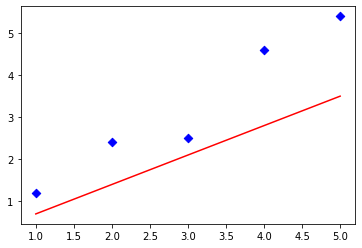

In [ ]:
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5]) # 
y = np.array([1.2, 2.4, 2.5, 4.6, 5.4]) # y 데이터

plt.scatter(x, y, color='blue', marker='D')
# 추정 그래프를 빨간색 실선으로 그림
plt.plot(x, 0.7 * x, 'r-')

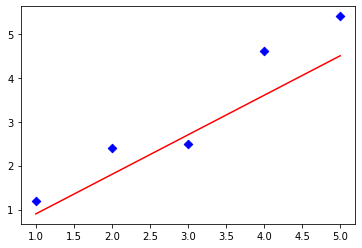

In [ ]:
plt.scatter(x, y, color='blue', marker='D')
# 추정 그래프를 빨간색 실선으로 그림
plt.plot(x, 0.9 * x, 'r-')

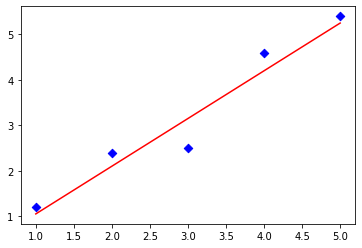

In [ ]:
plt.scatter(x, y, color='blue', marker='D')
# 추정 그래프를 빨간색 실선으로 그림
plt.plot(x, 1.05 * x, 'r-')

In [ ]:
import numpy as np

y = np.array([1.2, 2.4, 2.5, 4.6, 5.4])
y_hat = np.array([1, 2, 3, 4, 5])
diff = (y_hat - y) ** 2     # y_hat과 y의 차이값의 제곱
e_mse = diff.sum() / len(y)
print('평균 제곱 오차 = ', e_mse)

평균 제곱 오차 =  0.19399999999999995


In [ ]:
from sklearn.metrics import mean_squared_error

print('평균 제곱 오차 = ', mean_squared_error(y_hat, y))

평균 제곱 오차 =  0.19399999999999995


### 미분과 경사 하강법 (직접구현)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])

w, b = 0, 0    # w, b 초기값을 0으로 두자
learning_rate, epoch = 0.005, 1000 # 학습률과 학습횟수(에폭)
n = len(X)  # 입력데이터 개수

for i in range(epoch):   # 학습 루프
    y_pred = w*X + b     # 현재 w, b를 이용한 작업 T
    error = y_pred - y   # 성능척도 P
    w = w - learning_rate * (error * X).sum() # 경험 E로 개선
    b = b - learning_rate * error.sum()

print('w = ', w.round(2), 'b =', b.round(2))

w =  0.63 b = -1.65


### 미분과 경사 하강법 (scikit-learn 이용)

In [ ]:
from sklearn import linear_model
import numpy as np
X = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])
regr = linear_model.LinearRegression() # 절편값 b는 0으로 둔다
X = X[:, np.newaxis]
regr.fit(X, y) # 학습
print('w =', regr.coef_.round(2),\
      ', b =', regr.intercept_.round(2))

w = [0.63] , b = -1.65


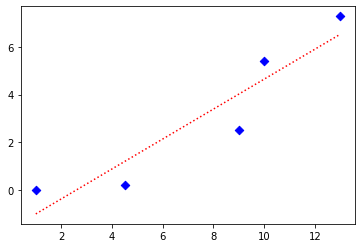

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])
plt.scatter(X, y, color='blue', marker='D')
# 계산으로 구한 w, b를 이용하여 선형 회귀 직선을 그리자
y_pred = 0.63 * X - 1.65  
plt.plot(X, y_pred, 'r:');

In [ ]:
# 학습률이 너무 작은 경우
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])

w, b = 0, 0    # w, b 초기값을 0으로 두자
learning_rate, epoch = 0.00001, 1000 # 학습률과 학습횟수(에폭)
n = len(X)  # 입력데이터 개수

for i in range(epoch):   # 학습 루프
    y_pred = w*X + b     # 현재 w, b를 이용한 작업 T
    error = y_pred - y   # 성능척도 P
    w = w - learning_rate * (error * X).sum() # 경험 E로 개선
    b = b - learning_rate * error.sum()

print('w = ', w.round(2), 'b =', b.round(2))

w =  0.45 b = 0.03


In [ ]:
# 학습률이 너무 큰 경우
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])

w, b = 0, 0    # w, b 초기값을 0으로 두자
learning_rate, epoch = 1.0, 1000 # 학습률과 학습횟수(에폭)
n = len(X)  # 입력데이터 개수

for i in range(epoch):   # 학습 루프
    y_pred = w*X + b     # 현재 w, b를 이용한 작업 T
    error = y_pred - y   # 성능척도 P
    w = w - learning_rate * (error * X).sum() # 경험 E로 개선
    b = b - learning_rate * error.sum()

print('w = ', w.round(2), 'b =', b.round(2))

w =  nan b = nan


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error as mse

# 5개 점의 x, y 좌표값
x = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])

w_list = np.arange(1.0, 0.2, -0.1)
for w in w_list:     # w를 바꾸어가며 예측치와 정답의 오차 비교
   y_hat = w * x
   print('w = {:.1f}, 평균제곱 오차: {:.2f}'.format(w, mse(y_hat, y)))

w = 1.0, 평균제곱 오차: 23.08
w = 0.9, 평균제곱 오차: 15.86
w = 0.8, 평균제곱 오차: 10.13
w = 0.7, 평균제곱 오차: 5.89
w = 0.6, 평균제곱 오차: 3.13
w = 0.5, 평균제곱 오차: 1.85
w = 0.4, 평균제곱 오차: 2.06
w = 0.3, 평균제곱 오차: 3.75


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error as mse 

# 5개 점의 x, y 좌표값
x = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])
ws = np.arange(1.0, 0.0, -0.1)
ys = []
print('ws =', ws)
for i in list(ws):
    y_hat = i * x
    ys.append(mse(y_hat, y))

print('ys : ', ys, 'min', np.min(ws))

ws = [1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1]
ys :  [23.077999999999996, 15.8625, 10.132000000000001, 5.886500000000003, 3.1260000000000012, 1.8505000000000003, 2.0599999999999987, 3.7544999999999957, 6.933999999999993, 11.59849999999999] min 0.1000000000000002


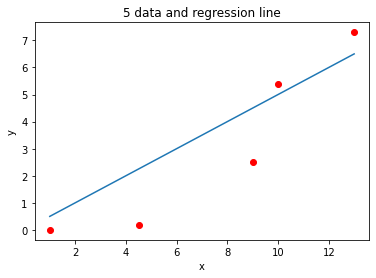

In [ ]:
import matplotlib.pyplot as plt

plt.title('5 data and regression line')

plt.scatter(x, y, c='red')
plt.plot(x, 0.5 * x)
plt.xlabel('x')              
plt.ylabel('y')    

plt.show()

Text(0, 0.5, 'mse')

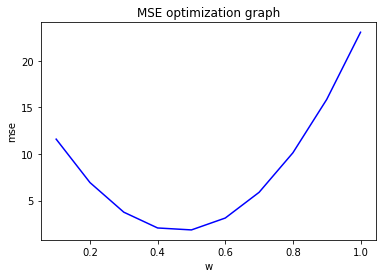

In [ ]:
plt.title('MSE optimization graph')
plt.plot(ws, ys, c='blue')

plt.xlabel('w')              
plt.ylabel('mse') 

In [ ]:
from sklearn import linear_model
import numpy as np

X = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])
regr = linear_model.LinearRegression() # 절편값 b는 0으로 둔다
X = X[:, np.newaxis]
regr.fit(X, y)         # 학습 

print('w =', regr.coef_.round(2), \
      ', b =', regr.intercept_.round(2))

w = [0.63] , b = -1.65


In [ ]:
import numpy as np

X = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])

w, b = 0, 0   # w, b의 초기값을 0으로 두자
# 적정한 하이퍼파라미터를 찾는 것이 중요
learning_rate, epoch = 0.005, 1000 # 학습률과 학습횟수
n = len(X)  # 입력데이터 개수

for i in range(epoch):  # 학습 루프
  y_pred = w*X + b      # 현재 w, b를 이용한 작업 T
  error = y_pred - y    # 성능척도 P
  w = w - learning_rate * (error * X).sum() # 경험 E로 개선
  b = b - learning_rate * error.sum()

print('w =', w.round(2), ', b =', b.round(2))

w = 0.63 , b = -1.65


# 사이킷런 활용(고급)

* 참고자료: https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.06-Linear-Regression.ipynb

## 단순선형회귀

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

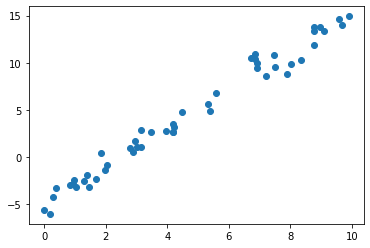

In [ ]:
# 임의의 데이터를 만듬
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

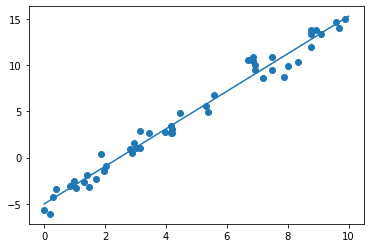

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [ ]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)
#기울기와 절편을 찾음

Model slope:     2.0272088103606953
Model intercept: -4.998577085553204


## 다중선형회귀

The ``LinearRegression`` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [ ]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3) #100by3 행렬만들어준거
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000056
[ 1.5 -2.   1. ]


In [ ]:
y = 0.5 + np.dot(X, [1.5, -2., 1.])
print(y)

[ -7.65001605   3.02325672   0.35036337   7.05055573 -13.72168905
   7.79781489   6.65121998  15.67866623  -3.39585387   6.47063839
   3.13194531  -2.18490669  -5.71211675  -0.54340051 -10.04666662
  -8.01736569   2.40972822   9.10543727  12.54752254  -2.08759851
   0.69789825  11.07258392   9.605085    -7.39496566  -9.5819122
 -12.09220005   6.07528275  -1.67478215  -9.08789409   7.92072795
 -12.26947425   3.38337796   2.60580635   8.49485669  15.7290878
  18.82834922  -7.35959816  -9.1266914   -6.08049658   1.35758248
   0.55704715  -7.61908232  -6.80655502   2.66852724  16.54883423
  -8.26888336   4.0730973    2.56190915   1.27548898   0.12605487
 -12.08490779   5.94114217   1.50446356  13.34317398  -5.21236827
   4.24165127   1.39153728   7.53574966   0.5498636    6.84793866
  13.26983794   4.33929089  -4.14100029   9.76579505   5.16058738
  16.54417044   0.27311013  -3.04666708   2.6734072   -0.59307536
 -11.10255971   4.74998129  -9.86537743   0.52199534 -10.27749464
  11.7496484

## 다중선형회귀 (다차식)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [ ]:
from sklearn.pipeline import make_pipeline
# 7승(7제곱)까지...
# 파이프라인 => 물흘러가듯이 데이터 전처리... 
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

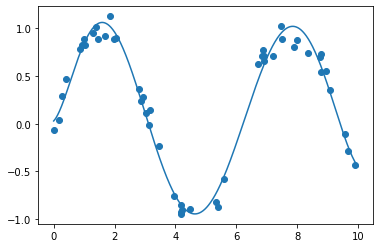

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [ ]:
from sklearn import set_config
set_config(display="diagram")
poly_model  # click on the diagram below to see the details of each step

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression())])